<a href="https://colab.research.google.com/github/lovgon/stepik-fast-start_to_AI/blob/main/3_1_NLP_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Предобработка текста

In [1]:
import nltk
import spacy
import re

### Токенизация

In [9]:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/admin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
data = "All work and no play makes jack a dull boy, all work and no play"
# разбит на токены предложение
tokens = word_tokenize(data)
tokens

['All',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'jack',
 'a',
 'dull',
 'boy',
 ',',
 'all',
 'work',
 'and',
 'no',
 'play']

### Удаление неинформативных слов

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [11]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('All',), ('work',), ('and',), ('no',), ('play',)]
[('All', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [12]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common())
print('Популярные биграммы: ', FreqDist(bigram).most_common())

Популярные униграммы:  [(('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2), (('All',), 1), (('makes',), 1), (('jack',), 1), (('a',), 1), (('dull',), 1), (('boy',), 1), ((',',), 1), (('all',), 1)]
Популярные биграммы:  [(('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('All', 'work'), 1), (('play', 'makes'), 1), (('makes', 'jack'), 1), (('jack', 'a'), 1), (('a', 'dull'), 1), (('dull', 'boy'), 1), (('boy', ','), 1), ((',', 'all'), 1), (('all', 'work'), 1)]


#### Стоп-слова

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'won', 'him', 'you', 'that', 'll', "weren't", 'who', 'theirs', 'an', 'of', 'between', 'isn', 'themselves', 'with', 'such', 'd', 'me', 'now', 'needn', "aren't", 'are', "haven't", 'doing', 'only', "won't", 'where', 'doesn', 'not', 'about', 'mightn', 'again', 'your', 'had', 'haven', 'its', 'wouldn', "you've", 'then', "you'd", 'under', 'during', "shouldn't", 'himself', 'once', 'from', 'to', 'it', 'all', 'each', 'they', 'been', 'if', 'few', 'his', "you're", 'too', 'my', 'o', 'for', "you'll", 's', 'this', 'further', "don't", 'couldn', 'or', 'herself', 'than', "should've", 'those', 'be', 'having', 'while', 'these', 'our', 'has', 'both', "that'll", 'was', 'why', 'the', 'no', 'being', 'below', 'here', 'at', 'hasn', 'any', 'same', 'more', 've', 'can', 'so', 'we', 'm', 'just', 'hers', 'their', 'into', 're', "wasn't", 'before', "couldn't", 'will', 'by', 'whom', 'but', 'them', 'after', 'over', "mightn't", 'itself', 'out', 'most', 'shouldn', 'against', 'because', 'down', 'yourselves', 'should', "ha

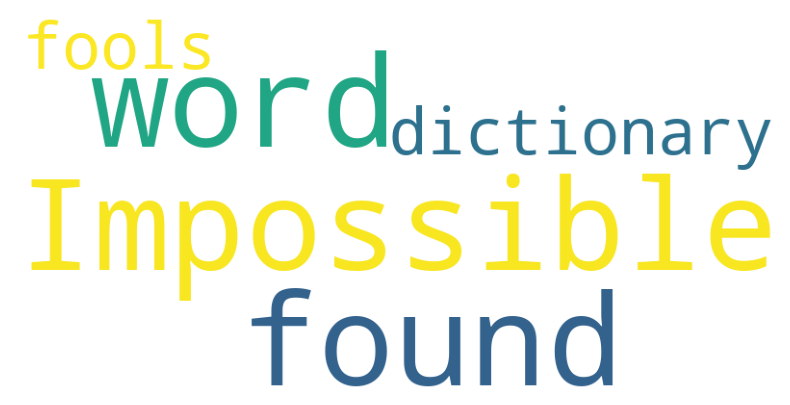

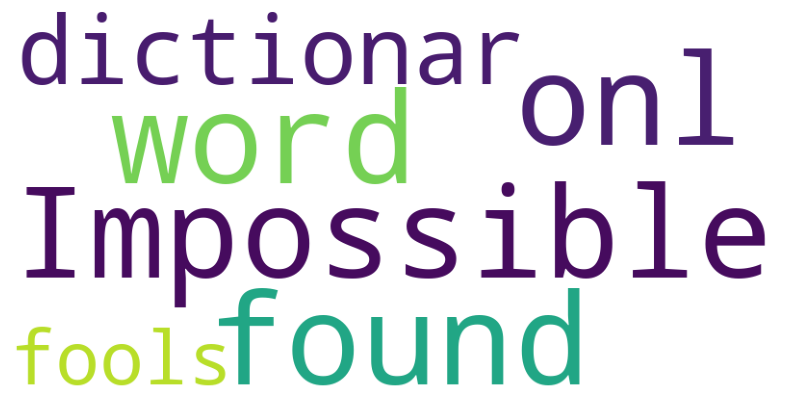

In [19]:
# Для произвольного массива текса убрать стоп слова
# вывести  график облако слов с стоп столвами и без стоп слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt
some_text = "Impossible is a word to be found only in the dictionary of fools."
for i in stopWords:
    some_text_without_stop_words = some_text.replace(i, "")
# вывести  график облако слов с стоп столвами и без стоп слов
# Создание облака слов
wordcwordcloud_without_stop_words = WordCloud(width=800, height=400, background_color='white').generate(some_text_without_stop_words)
wordcwordcloud_with_stop_words = WordCloud(width=800, height=400, background_color='white').generate(some_text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcwordcloud_with_stop_words)
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(wordcwordcloud_without_stop_words)
plt.axis('off')
plt.show()

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [20]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [21]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [22]:
# по анолгии стемпинг для русского корпуса (SnowballStemmer)
ss = SnowballStemmer("russian")
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [23]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

In [26]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(raw)
print(' '.join([token.lemma_ for token in doc]))

DENNIS : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


In [27]:
[(token.lemma_, token.pos_) for token in doc[:7]]

[('DENNIS', 'PROPN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

### Поиск шаблонов

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [29]:
re.findall(r'\d+', 'There is some numbers: 49 and 432')

['49', '432']

In [31]:
re.sub(r'[,\.?!]',' ','How, to? split. text!').split()

['How', 'to', 'split', 'text']

In [32]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']